# 时间序列基础

## $ARMA$ 模型

### $AR(p)$ 模型

在时间序列分析中，$AR(p)$ 模型是最基本的模型之一。它假设当前值与过去 $p$ 个时刻的值存在线性关系。一般形式为：

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \epsilon_t \tag{1}
$$

其中，$\phi_1, \phi_2, ..., \phi_p$ 是模型参数，$\epsilon_t$ 是白噪声项。

#### $AR(1)$ 模型
当 $p=1$ 时，$AR(1)$ 模型为：

$$
X_t = \phi_1 X_{t-1} + \epsilon_t \tag{2}
$$

虽然看起来很简单，但 $AR(1)$ 模型在时间序列分析中非常重要，因为它可以捕捉到数据的自相关性。从模型设定形式上来看，它具有递推的特征，当前值仅与前一个值相关。

具体而言，(2) 式在 $t-1$ 时刻可以表示为：

$$
X_{t-1} = \phi_1 X_{t-2} + \epsilon_{t-1} \tag{3}
$$

将 (3) 式代入 (2) 式中，我们可以得到：

$$
X_t = \phi_1 (\phi_1 X_{t-2} + \epsilon_{t-1}) + \epsilon_t = \phi_1^2 X_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \tag{4}
$$

将 (4) 式继续递推下去，我们可以得到：

$$
X_t = \phi_1^t X_0 + \sum_{i=0}^{t-1} \phi_1^i \epsilon_{t-i} \tag{5}
$$

由 (5) 式可知，$X_t$ 由初始值 $X_0$ 和过去的随机扰动项 $\epsilon_{t-i}$ 线性组合而成。

由此，我们可以看出 $AR(1)$ 模型的一个重要特性：当前值 $X_t$ 不仅与前一个值 $X_{t-1}$ 相关，还与更早的值 $X_{t-2}, X_{t-3}, ...$ 相关。具体来说，当前值 $X_t$ 是过去所有随机扰动项 $\epsilon_{t-i}$ 的加权和，其中权重由 $\phi_1^i$ 决定。随着 $i$ 的增大，权重 $\phi_1^i$ 会迅速减小，这表明较早的随机扰动对当前值的影响逐渐减弱。

因此，$AR(1)$ 模型可以看作是一个具有指数衰减特性的模型。也就是说，当前值 $X_t$ 主要受到最近的随机扰动项 $\epsilon_{t-1}$ 的影响，而对更早的随机扰动项的影响则逐渐减弱。这种特性使得 $AR(1)$ 模型在建模时间序列数据时非常实用，因为它能够有效地捕捉到数据的自相关性和记忆效应。

在实际应用中，$AR(1)$ 模型常用于建模具有自相关性的时间序列数据，如股票价格、气温等。通过估计参数 $\phi_1$，我们可以了解数据的自相关程度，从而为后续的预测和分析提供依据。



#### 单位根过程 

前面已经提到，只有当 $|\phi_1|<1$ 时，$AR(1)$ 模型才是平稳的。平稳性是时间序列分析中的一个重要概念，它意味着序列的统计特性（如均值、方差和自相关函数）在时间上保持不变。平稳序列的均值和方差是有限的，并且自相关函数仅依赖于时间间隔，而与具体时间点无关。

那么，当 $|\phi_1|=1$ 时，$AR(1)$ 模型会发生什么呢？在这种情况下，模型变为：

$$
X_t = X_{t-1} + \epsilon_t \tag{6}
$$

我们称这种模型为单位根过程。单位根过程是一种特殊的非平稳序列，其均值和方差随时间变化而变化。具体来说，单位根过程的均值是无限的，而方差是无穷大的。这意味着单位根过程具有非常强的记忆效应，过去的随机扰动对当前值的影响不会随着时间的推移而减弱。

我们可以将 $\phi_1 = 1$ 带入 (5) 式中，得到：

$$
x_t = X_0 + \sum_{i=0}^{t-1} \epsilon_{t-i} \tag{5}
$$

可见，过往的随机扰动项 $\epsilon_{t-i}$ 对当前值 $X_t$ 的影响具有累积性，且它们的影响不会随着时间的推移而减弱。这种特性使得单位根过程具有非常强的记忆效应。用大白话来说，它很记仇，即使是 30 年前受到的冲击，它今天仍然记忆犹新。

具体而言，单位根过程的均值和方差可以表示为：

$$
\mu_t = E[X_t] = E[X_{t-1}] + E[\epsilon_t] = \mu_{t-1} + 0 = \mu_0 \tag{7}
$$

$$
\sigma^2_t = Var[X_t] = Var[X_{t-1}] + Var[\epsilon_t] = \sigma^2_{t-1} + \sigma^2_\epsilon = \sigma^2_0 + t \cdot \sigma^2_\epsilon \tag{8}
$$


#### AR 过程与单位根过程的区别

AR 过程和单位根过程的主要区别在于平稳性。AR 过程是平稳的，而单位根过程是非平稳的。平稳性意味着序列的统计特性在时间上保持不变，而非平稳性则意味着序列的统计特性随时间变化而变化。

平稳序列的均值和方差是有限的，并且自相关函数仅依赖于时间间隔，而与具体时间点无关。非平稳序列的均值和方差是无限的，并且自相关函数依赖于具体时间点。

下面，我们通过一个简单的模拟实例来说明 AR 过程和单位根过程的区别。


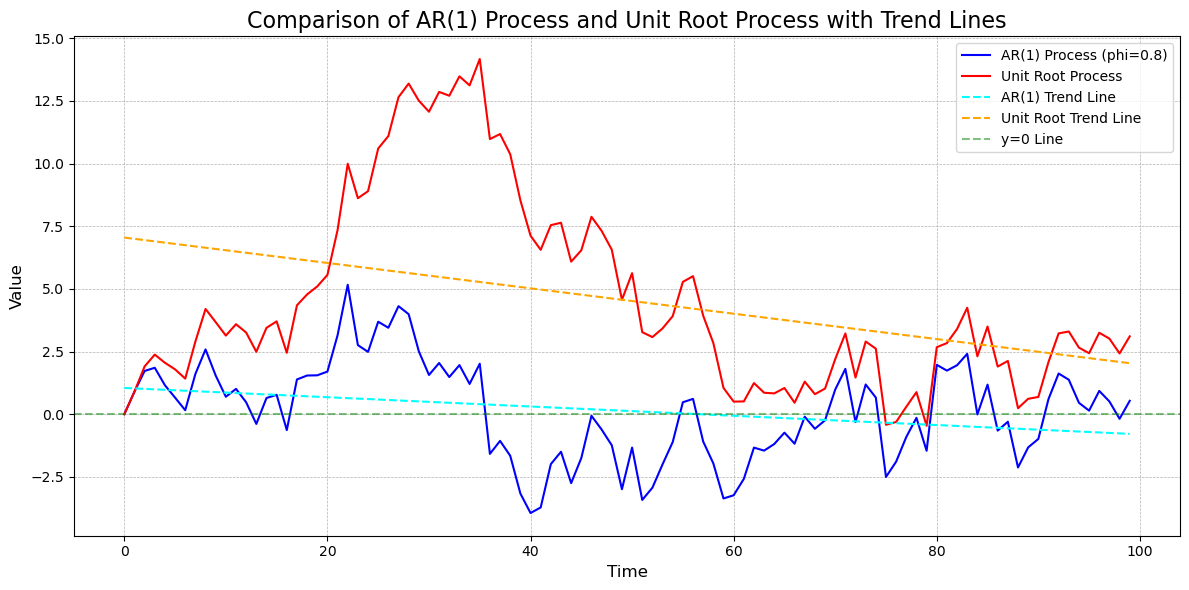

AR(1) Process Statistics:
count    100.00
mean       0.13
std        1.91
min       -3.94
25%       -1.26
50%        0.31
75%        1.55
max        5.17
dtype: float64

Unit Root Process Statistics:
count    100.00
mean       4.54
std        3.85
min       -0.46
25%        1.91
50%        3.26
75%        6.56
max       14.17
dtype: float64


In [ ]:
# 模拟分析平稳 AR(1) 过程与单位根过程的差别

import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以保证结果可重复
np.random.seed(42)

# 模拟 AR(1) 过程 --------- 参数设定 -----------
n = 100  # 时间序列长度
phi = 0.8  # AR(1) 系数
# ------------------------ 参数设定 -----------

epsilon = np.random.normal(0, 1, n)  # 白噪声
ar1 = np.zeros(n)
for t in range(1, n):
    ar1[t] = phi * ar1[t-1] + epsilon[t]

# 模拟单位根过程
unit_root = np.zeros(n)
for t in range(1, n):
    unit_root[t] = unit_root[t-1] + epsilon[t]

# 绘图比较
plt.figure(figsize=(12, 6))
plt.plot(ar1, label="AR(1) Process (phi=0.8)", color="blue")
plt.plot(unit_root, label="Unit Root Process", color="red")

# 添加时间趋势线
time = np.arange(n)
ar1_trend = np.poly1d(np.polyfit(time, ar1, 1))(time)
unit_root_trend = np.poly1d(np.polyfit(time, unit_root, 1))(time)

# 绘图
plt.plot(time, ar1_trend, label="AR(1) Trend Line", color="cyan", linestyle="--")
plt.plot(time, unit_root_trend, label="Unit Root Trend Line", color="orange", linestyle="--")

plt.axhline(y=0, color="green", linestyle="--", alpha=0.5, label="y=0 Line")
plt.title("Comparison of AR(1) Process and Unit Root Process with Trend Lines", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# 基本统计量
import pandas as pd

print("AR(1) Process Statistics:")
print(pd.Series(ar1).describe().round(2))

print("\nUnit Root Process Statistics:")
print(pd.Series(unit_root).describe().round(2))


### 相关图和偏相关图

#### 相关图 (ACF, Autocorrelation Function)
相关图展示了时间序列数据在不同滞后期的自相关系数。自相关系数衡量了当前值与过去值之间的线性关系，其定义公式为：

$$
\rho_k = \frac{\text{Cov}(X_t, X_{t-k})}{\sqrt{\text{Var}(X_t) \cdot \text{Var}(X_{t-k})}}
$$

其中，$k$ 表示滞后期，$\text{Cov}$ 表示协方差，$\text{Var}$ 表示方差。

#### 偏相关图 (PACF, Partial Autocorrelation Function)
偏相关图展示了时间序列数据在不同滞后期的偏自相关系数。偏自相关系数衡量了当前值与某一滞后值之间的线性关系，剔除了其他中间滞后值的影响。其定义公式为：

$$
\phi_{kk} = \text{Partial Correlation}(X_t, X_{t-k} | X_{t-1}, X_{t-2}, \dots, X_{t-(k-1)})
$$

偏相关系数可以通过递归方法（如 Durbin-Levinson 算法）计算。

#### AR(p) 模型的相关图和偏相关图特征
- **相关图 (ACF)**：AR(p) 模型的自相关函数通常在滞后期 $k > p$ 时呈指数衰减或振荡衰减。
- **偏相关图 (PACF)**：AR(p) 模型的偏自相关函数在滞后期 $k > p$ 时迅速趋近于零，而在 $k \leq p$ 时可能显著。

#### 单位根过程的相关图特征
单位根过程（如随机游走）的相关图和偏相关图具有以下特征：
- **相关图 (ACF)**：自相关函数在所有滞后期 $k$ 上都接近于 1，且衰减非常缓慢。
- **偏相关图 (PACF)**：偏自相关函数在滞后期 $k = 1$ 时显著，而在 $k > 1$ 时迅速趋近于零。

这些特征反映了单位根过程的非平稳性和强记忆效应。


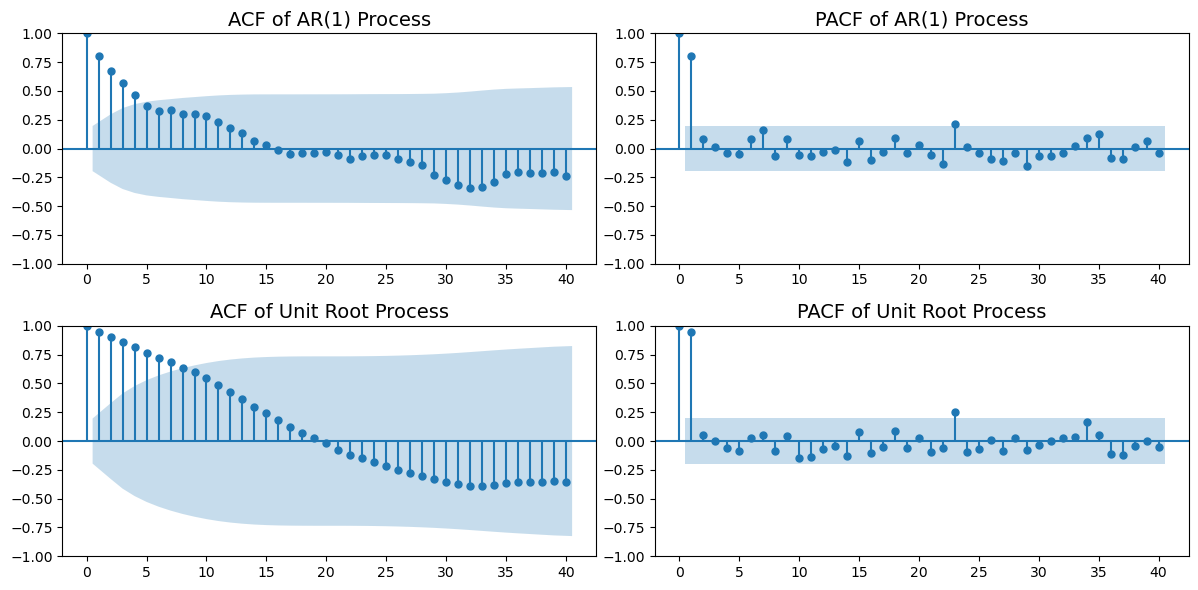

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

# 绘制 AR(1) 过程的 ACF 和 PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plot_acf(ar1, lags=40, ax=plt.gca())
plt.title('ACF of AR(1) Process', fontsize=14)
plt.subplot(2, 2, 2)
plot_pacf(ar1, lags=40, ax=plt.gca())
plt.title('PACF of AR(1) Process', fontsize=14)

# 绘制单位根过程的 ACF 和 PACF
plt.subplot(2, 2, 3)
plot_acf(unit_root, lags=40, ax=plt.gca())
plt.title('ACF of Unit Root Process', fontsize=14)
plt.subplot(2, 2, 4)
plot_pacf(unit_root, lags=40, ax=plt.gca())
plt.title('PACF of Unit Root Process', fontsize=14)

plt.tight_layout()
plt.show()

## MA 过程

### 移动平均过程 (Moving Average Process)

移动平均过程 (MA) 是时间序列分析中的一种基本模型。它假设当前值是过去若干期随机扰动项的线性组合。MA 过程的数学表达式为：

$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} \tag{1}
$$

其中：
- $X_t$ 是时间序列的当前值；
- $\mu$ 是序列的均值；
- $\epsilon_t$ 是白噪声项，满足 $E[\epsilon_t] = 0$ 和 $Var[\epsilon_t] = \sigma^2$；
- $\theta_1, \theta_2, \dots, \theta_q$ 是模型参数；
- $q$ 是移动平均过程的阶数。

### MA(1) 模型

当 $q=1$ 时，MA(1) 模型的形式为：

$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} \tag{2}
$$

在 MA(1) 模型中，当前值 $X_t$ 由当前随机扰动 $\epsilon_t$ 和前一期随机扰动 $\epsilon_{t-1}$ 的加权和决定。

### MA 过程的特性

1. **平稳性**：MA 过程是平稳的，因为它仅依赖于有限个随机扰动项。
2. **自相关函数 (ACF)**：  
    - MA(q) 模型的自相关函数在滞后期 $k > q$ 时为 0；  
    - 在滞后期 $k \leq q$ 时，自相关函数可能显著。
3. **偏自相关函数 (PACF)**：  
    - MA(q) 模型的偏自相关函数在所有滞后期 $k > 1$ 时迅速衰减；  
    - 在滞后期 $k = 1$ 时，偏自相关函数可能显著。

### MA 过程的应用

MA 过程常用于建模时间序列中的短期依赖关系。例如：
- 经济数据中的短期波动；
- 金融数据中的短期价格变化。

### AR 过程和 MA 过程的区别

AR 过程和 MA 过程是时间序列分析中的两种基本模型，它们在建模思路、平稳性、自相关函数和偏自相关函数等方面存在显著差异。以下是它们的主要区别：
- **建模思路**：AR 过程假设当前值与过去值之间存在线性关系，而 MA 过程假设当前值是过去随机扰动项的线性组合。
- **平稳性**：AR 过程的平稳性取决于参数的取值，而 MA 过程是平稳的，因为它仅依赖于有限个随机扰动项。


### AR(1) 可以表示为 MA(∞)

AR(1) 过程可以通过递归展开的方式表示为 MA(∞) 过程。具体来说，假设 AR(1) 模型为：

$$
X_t = \phi X_{t-1} + \epsilon_t
$$

将 $X_{t-1}$ 代入上述公式，可以得到：

$$
X_t = \phi (\phi X_{t-2} + \epsilon_{t-1}) + \epsilon_t = \phi^2 X_{t-2} + \phi \epsilon_{t-1} + \epsilon_t
$$

继续递归下去，可以得到：

$$
X_t = \phi^t X_0 + \sum_{i=0}^{\infty} \phi^i \epsilon_{t-i}
$$

由此可见，AR(1) 过程可以表示为一个 MA(∞) 过程，其中当前值 $X_t$ 是所有过去随机扰动项 $\epsilon_{t-i}$ 的加权和，权重由 $\phi^i$ 决定，并随着 $i$ 的增大呈指数衰减。



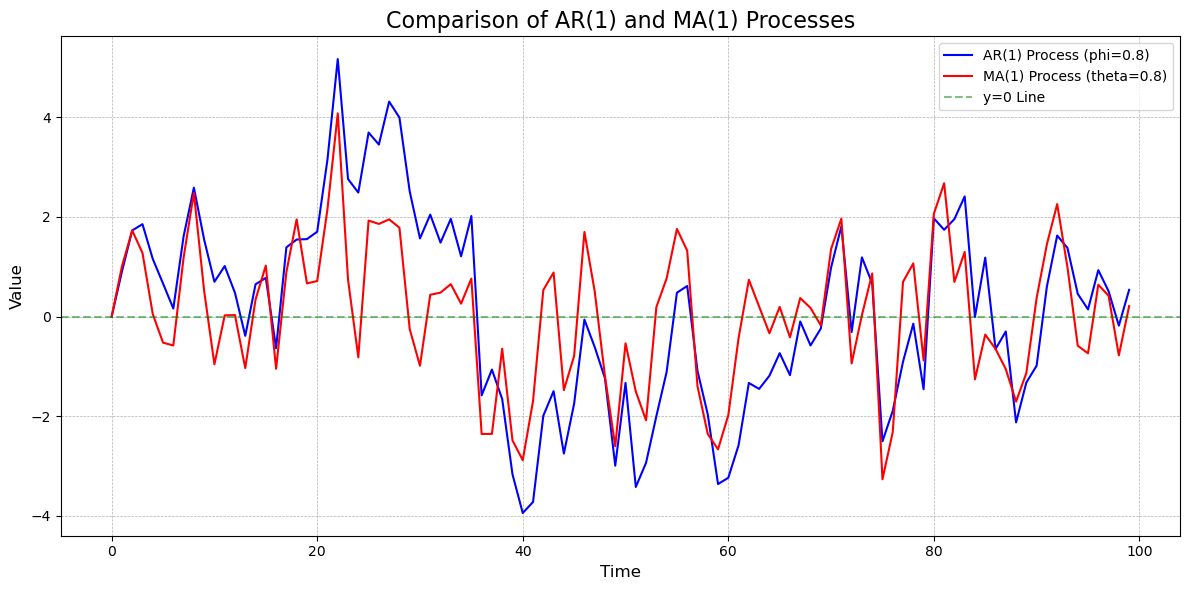

In [ ]:
# 模拟分析：AR(1) 和 MA(1) 过程的差别

# 模拟 MA(1) 过程
theta = 0.8  # MA(1) 系数
ma1 = np.zeros(n)
for t in range(1, n):
    ma1[t] = epsilon[t] + theta * epsilon[t-1]

# 绘图比较 AR(1) 和 MA(1) 过程
plt.figure(figsize=(12, 6))
plt.plot(ar1, label="AR(1) Process (phi=0.8)", color="blue")
plt.plot(ma1, label="MA(1) Process (theta=0.8)", color="red")

# 添加时间趋势线
plt.axhline(y=0, color="green", linestyle="--", alpha=0.5, label="y=0 Line")

plt.title("Comparison of AR(1) and MA(1) Processes", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


### AR(1) 和 MA(1) 的区别：ACF 和 PACF

AR(1) 和 MA(1) 模型在自相关函数 (ACF) 和偏自相关函数 (PACF) 上有显著的区别。以下是它们的主要区别：
- **AR(1) 模型**：
  - ACF：在滞后期 $k > 1$ 时，ACF 呈指数衰减或振荡衰减；
  - PACF：在滞后期 $k = 1$ 时显著，而在 $k > 1$ 时迅速趋近于零。
  - 这表明 AR(1) 模型具有长记忆效应，当前值与过去值之间存在较强的线性关系。
- **MA(1) 模型**：
  - ACF：在滞后期 $k > 1$ 时迅速趋近于零；
  - PACF：在滞后期 $k = 1$ 时显著，而在 $k > 1$ 时迅速趋近于零。
  - 这表明 MA(1) 模型具有短记忆效应，当前值主要受最近的随机扰动项影响。

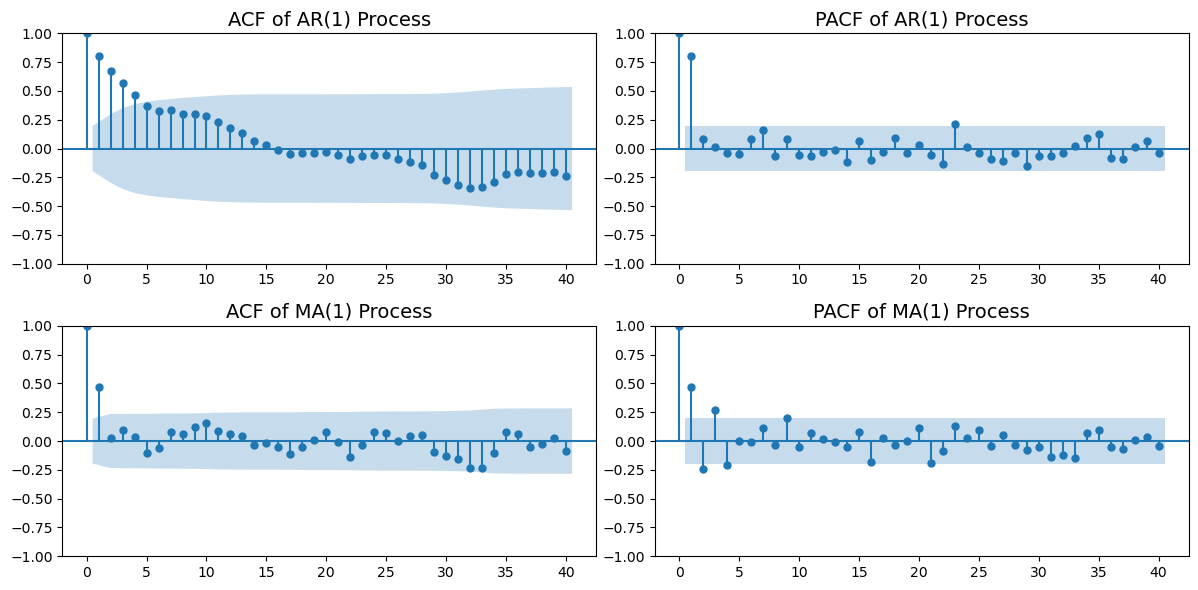

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF 和 PACF 分析：AR(1) v.s. MA(1)
import matplotlib.pyplot as plt

# 绘制 AR(1) 过程的 ACF 和 PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plot_acf(ar1, lags=40, ax=plt.gca())
plt.title('ACF of AR(1) Process', fontsize=14)
plt.subplot(2, 2, 2)
plot_pacf(ar1, lags=40, ax=plt.gca())
plt.title('PACF of AR(1) Process', fontsize=14)

# 绘制 MA(1) 过程的 ACF 和 PACF
plt.subplot(2, 2, 3)
plot_acf(ma1, lags=40, ax=plt.gca())
plt.title('ACF of MA(1) Process', fontsize=14)
plt.subplot(2, 2, 4)
plot_pacf(ma1, lags=40, ax=plt.gca())
plt.title('PACF of MA(1) Process', fontsize=14)

plt.tight_layout()
plt.show()


## ARMA(p, q) 模型

ARMA 模型（AutoRegressive Moving Average Model，自回归移动平均模型）是时间序列分析中的一种经典模型。它结合了 AR(p) 模型和 MA(q) 模型的特性，用于描述时间序列数据的线性依赖结构。

ARMA(p, q) 模型的数学表达式为：

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
$$

其中：
- $X_t$ 是时间序列的当前值；
- $\phi_1, \phi_2, \dots, \phi_p$ 是 AR 部分的参数；
- $\theta_1, \theta_2, \dots, \theta_q$ 是 MA 部分的参数；
- $\epsilon_t$ 是白噪声项，满足 $E[\epsilon_t] = 0$ 和 $Var[\epsilon_t] = \sigma^2$；
- $p$ 是自回归部分的阶数；
- $q$ 是移动平均部分的阶数。

### 特性

1. **平稳性**：ARMA 模型要求时间序列是平稳的，即均值、方差和自相关函数在时间上保持不变。
2. **自相关函数 (ACF)** 和 **偏自相关函数 (PACF)**：
    - ARMA 模型的 ACF 和 PACF 通常在滞后期 $k > \max(p, q)$ 时迅速衰减。
    - ACF 和 PACF 的具体模式取决于 $p$ 和 $q$ 的值。

### 模型选择

在实际应用中，选择 ARMA 模型的阶数 $p$ 和 $q$ 通常需要结合以下方法：
1. **ACF 和 PACF 图**：通过观察时间序列的 ACF 和 PACF 图，初步判断 $p$ 和 $q$ 的可能值。
2. **信息准则**：如 AIC（Akaike 信息准则）和 BIC（贝叶斯信息准则），用于选择最优的 $p$ 和 $q$。
3. **模型拟合优度**：通过比较不同模型的拟合效果，选择最优模型。

### 应用场景

ARMA 模型适用于平稳时间序列的建模和预测，常见的应用场景包括：
- 经济数据（如 GDP、消费指数）的短期预测；
- 金融数据（如股票价格、汇率）的波动分析；
- 工业过程中的信号处理。

### 示例

在上文中，我们已经模拟了 AR(1) 和 MA(1) 过程，并绘制了它们的 ACF 和 PACF 图。接下来，我们可以尝试拟合 ARMA 模型来描述这些时间序列的特性。

以下是拟合 ARMA 模型的步骤：
1. 检查时间序列的平稳性（如 ADF 检验）。
2. 绘制 ACF 和 PACF 图，初步判断 $p$ 和 $q$ 的值。
3. 使用 `statsmodels` 库中的 `ARIMA` 模块拟合 ARMA 模型。
4. 检查模型的残差是否为白噪声。
5. 使用模型进行预测。

通过 ARMA 模型，我们可以更好地理解时间序列的动态特性，并进行有效的预测。

### 注意

多数情况下，使用 ARMA(1,1) 模型就可以描述多数平稳时间序列的特征：

$$
X_t = \phi_1 X_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t
$$

### 单位根检验

从上面的 $ARMA(1,1)$ 模型的结果来看，$AR(1)$ 系数的估计值为 $0.9847$，接近于 $1$，这表明该序列可能是一个单位根序列。

我们可以使用 `statsmodels` 库中的 `adfuller` 函数来进行单位根检验。

#### ADF 检验
给定一个时间序列 $X_t$，我们可以使用以下的 ADF 检验来检验 $X_t$ 是否是平稳的：
$$
X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \epsilon_t$$
其中，$\epsilon_t$ 是一个白噪声序列。

ADF 检验的原假设是：$X_t$ 是一个单位根序列，即 $H_0: \phi_1 = 1$。
如果 $H_0$ 被拒绝，则说明 $X_t$ 是平稳的。

ADF 检验包含几种典型的数据生成机制：
- 纯随机游走：$X_t = X_{t-1} + \epsilon_t$，其中 $\epsilon_t$ 是一个白噪声序列。
- 随机游走加趋势：$X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 t + \epsilon_t$，其中 $\epsilon_t$ 是一个白噪声序列，$t$ 是时间趋势项。
- 随机游走加季节性：$X_t = \phi_0 + \phi_1 X_{t-1} + S_t + \epsilon_t$，其中 $\epsilon_t$ 是一个白噪声序列，$S_t$ 是季节性项。
- 随机游走加趋势和季节性：$X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 t + S_t + \epsilon_t$，其中 $\epsilon_t$ 是一个白噪声序列，$t$ 是时间趋势项，$S_t$ 是季节性项。

#### KPSS 检验
KPSS 检验的原假设是：$X_t$ 是平稳的，即 $H_0: \phi_1 < 1$。
如果 $H_0$ 被拒绝，则说明 $X_t$ 是一个单位根序列。

#### PP 检验
PP 检验的原假设是：$X_t$ 是一个单位根序列，即 $H_0: \phi_1 = 1$。
如果 $H_0$ 被拒绝，则说明 $X_t$ 是平稳的。

#### 实操


#### 模拟分析

#### 模拟分析

我们生成四个不同的时间序列，分别是 AR(1)、带时间趋势的 AR(1)、ARMA(1,1) 和单位根过程。以下是它们的生成过程：

1. **AR(1) 平稳序列**  
    AR(1) 模型的数学表达式为：  
    $$
    X_t = \phi X_{t-1} + \epsilon_t
    $$  
    其中，$\phi = 0.8$，$\epsilon_t$ 是均值为 0、方差为 1 的白噪声。

2. **带时间趋势的 AR(1) 序列**  
    在 AR(1) 模型的基础上加入线性时间趋势：  
    $$
    X_t = \phi X_{t-1} + \epsilon_t + \text{trend}(t)
    $$  
    其中，$\text{trend}(t)$ 是一个线性增长的时间趋势项。

3. **ARMA(1,1) 平稳序列**  
    ARMA(1,1) 模型的数学表达式为：  
    $$
    X_t = \phi X_{t-1} + \epsilon_t + \theta \epsilon_{t-1}
    $$  
    其中，$\phi = 0.8$，$\theta = 0.5$，$\epsilon_t$ 是均值为 0、方差为 1 的白噪声。

4. **单位根过程**  
    单位根过程的数学表达式为：  
    $$
    X_t = X_{t-1} + \epsilon_t
    $$  
    其中，$\epsilon_t$ 是均值为 0、方差为 1 的白噪声。

通过这些序列的生成，我们可以观察不同时间序列的特性，并进行单位根检验和其他分析。

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 模拟四个序列
np.random.seed(42)
n = 200  # 时间序列长度
epsilon = np.random.normal(0, 1, n)

# 1. AR(1) 平稳
phi = 0.8
ar1_stationary = np.zeros(n)
for t in range(1, n):
    ar1_stationary[t] = phi * ar1_stationary[t-1] + epsilon[t]

# 2. AR(1) + 时间趋势
trend = np.linspace(0, 10, n)
ar1_with_trend = np.zeros(n)
for t in range(1, n):
    ar1_with_trend[t] = phi * ar1_with_trend[t-1] + epsilon[t]
ar1_with_trend += trend

# 3. ARMA(1,1) 平稳
theta = 0.5
arma11_stationary = np.zeros(n)
for t in range(1, n):
    arma11_stationary[t] = phi * arma11_stationary[t-1] + epsilon[t] + theta * epsilon[t-1]

# 4. 单位根过程
unit_root = np.zeros(n)
for t in range(1, n):
    unit_root[t] = unit_root[t-1] + epsilon[t]


### 图形比较

我们先直观地展示这四个序列的图形，然后再分析其 ACF 和 PACF 图，最后通过单位根检验来验证它们的平稳性。

In [ ]:
# 绘图比较
plt.figure(figsize=(12, 8))

# AR(1) 平稳序列
plt.subplot(2, 2, 1)
plt.plot(ar1_stationary, label="AR(1) Stationary", color="blue")
plt.title("AR(1) Stationary Sequence", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

# AR(1) + 时间趋势序列
plt.subplot(2, 2, 2)
plt.plot(ar1_with_trend, label="AR(1) with Trend", color="orange")
plt.title("AR(1) with Trend Sequence", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

# ARMA(1,1) 平稳序列
plt.subplot(2, 2, 3)
plt.plot(arma11_stationary, label="ARMA(1,1) Stationary", color="green")
plt.title("ARMA(1,1) Stationary Sequence", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

# 单位根过程
plt.subplot(2, 2, 4)
plt.plot(unit_root, label="Unit Root Process", color="red")
plt.title("Unit Root Process", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

### ACF 和 PACF 图

我们可以使用 `statsmodels` 库中的 `plot_acf` 和 `plot_pacf` 函数来绘制 ACF 和 PACF 图。以下是对四个序列的 ACF 和 PACF 图的分析：

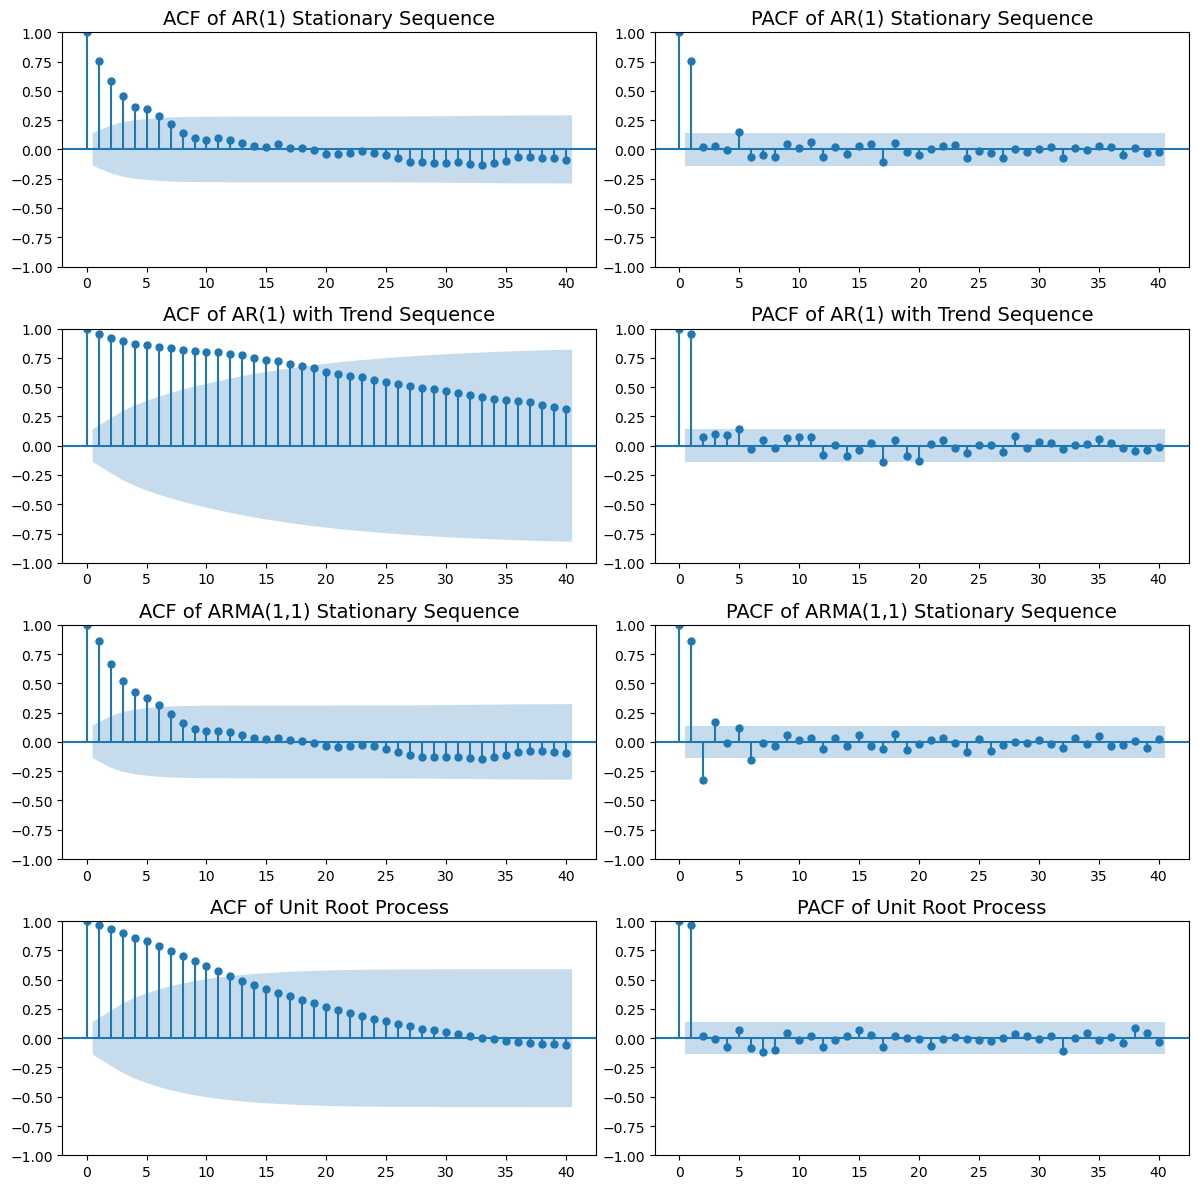

In [8]:
# 绘制 ACF 和 PACF 图

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 12))

# AR(1) 平稳序列
plt.subplot(4, 2, 1)
plot_acf(ar1_stationary, lags=40, ax=plt.gca())
plt.title('ACF of AR(1) Stationary Sequence', fontsize=14)
plt.subplot(4, 2, 2)
plot_pacf(ar1_stationary, lags=40, ax=plt.gca())
plt.title('PACF of AR(1) Stationary Sequence', fontsize=14)

# AR(1) + 时间趋势序列
plt.subplot(4, 2, 3)
plot_acf(ar1_with_trend, lags=40, ax=plt.gca())
plt.title('ACF of AR(1) with Trend Sequence', fontsize=14)
plt.subplot(4, 2, 4)
plot_pacf(ar1_with_trend, lags=40, ax=plt.gca())
plt.title('PACF of AR(1) with Trend Sequence', fontsize=14)

# ARMA(1,1) 平稳序列
plt.subplot(4, 2, 5)
plot_acf(arma11_stationary, lags=40, ax=plt.gca())
plt.title('ACF of ARMA(1,1) Stationary Sequence', fontsize=14)
plt.subplot(4, 2, 6)
plot_pacf(arma11_stationary, lags=40, ax=plt.gca())
plt.title('PACF of ARMA(1,1) Stationary Sequence', fontsize=14)

# 单位根过程
plt.subplot(4, 2, 7)
plot_acf(unit_root, lags=40, ax=plt.gca())
plt.title('ACF of Unit Root Process', fontsize=14)
plt.subplot(4, 2, 8)
plot_pacf(unit_root, lags=40, ax=plt.gca())
plt.title('PACF of Unit Root Process', fontsize=14)

plt.tight_layout()
plt.show()


### 单位根检验

我们可以使用 `statsmodels` 库中的 `adfuller` 函数来进行单位根检验。以下是对四个序列的单位根检验结果的分析：

In [9]:

# 定义 test_stationarity 函数
def test_stationarity(timeseries):
    # 进行ADF检验
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    if adf_result[1] <= 0.05:
        print("Reject the null hypothesis: The time series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The time series is non-stationary.")

    # 进行KPSS检验
    from statsmodels.tsa.stattools import kpss
    kpss_result = kpss(timeseries, regression='c')
    print(f'KPSS Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    if kpss_result[1] <= 0.05:
        print("Reject the null hypothesis: The time series is non-stationary.")
    else:
        print("Fail to reject the null hypothesis: The time series is stationary.")


# 执行单位根检验
print("AR(1) 平稳序列:")
test_stationarity(ar1_stationary)

print("\nAR(1) + 时间趋势序列:")
test_stationarity(ar1_with_trend)

print("\nARMA(1,1) 平稳序列:")
test_stationarity(arma11_stationary)

print("\n单位根序列:")
test_stationarity(unit_root)


AR(1) 平稳序列:
ADF Statistic: -5.1401880921986685
p-value: 1.1632040113030515e-05
Reject the null hypothesis: The time series is stationary.
KPSS Statistic: 0.40971623118293043
p-value: 0.0729671417314955
Fail to reject the null hypothesis: The time series is stationary.

AR(1) + 时间趋势序列:
ADF Statistic: -1.083734015465617
p-value: 0.7215148114561589
Fail to reject the null hypothesis: The time series is non-stationary.
KPSS Statistic: 1.9346683267076523
p-value: 0.01
Reject the null hypothesis: The time series is non-stationary.

ARMA(1,1) 平稳序列:
ADF Statistic: -3.6707270981703126
p-value: 0.00454426048226689
Reject the null hypothesis: The time series is stationary.
KPSS Statistic: 0.40642058881067256
p-value: 0.07438767723677908
Fail to reject the null hypothesis: The time series is stationary.

单位根序列:
ADF Statistic: -2.3072851790645252
p-value: 0.1696291207894372
Fail to reject the null hypothesis: The time series is non-stationary.
KPSS Statistic: 0.7001396636588889
p-value: 0.013532757

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29332\3041600984.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries, regression='c')


In [ ]:

## VAR 模型
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts

# 1. 检验平稳性
def test_stationarity(timeseries):
    # 进行ADF检验
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    if adf_result[1] <= 0.05:
        print("Reject the null hypothesis: The time series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The time series is non-stationary.")

    # 进行KPSS检验
    kpss_result = kpss(timeseries, regression='c')
    print(f'KPSS Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    if kpss_result[1] <= 0.05:
        print("Reject the null hypothesis: The time series is non-stationary.")
    else:
        print("Fail to reject the null hypothesis: The time series is stationary.")

# 2. 绘制自相关和偏自相关图
def plot_acf_pacf(timeseries):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plot_acf(timeseries, lags=40, ax=ax[0])
    plot_pacf(timeseries, lags=40, ax=ax[1])
    plt.show()

# 3. VAR模型
def fit_var_model(data, maxlags=15):
    model = VAR(data)
    results = model.fit(maxlags=maxlags, ic='aic')
    print(results.summary())
    return results

# 4. Granger因果关系检验
def granger_causality_test(data, max_lag=15):
    test_result = grangercausalitytests(data, max_lag, verbose=True)
    return test_result

# 5. 协整检验
def cointegration_test(data):
    score, p_value, _ = coint(data.iloc[:, 0], data.iloc[:, 1])
    print(f'Cointegration test statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value <= 0.05:
        print("Reject the null hypothesis: The time series are cointegrated.")
    else:
        print("Fail to reject the null hypothesis: The time series are not cointegrated.")

# 6. VAR模型的脉冲响应函数
def impulse_response_function(model, steps=10):
    irf = model.irf(steps)
    irf.plot(orth=False)
    plt.show()

# 7. VAR模型的方差分解
def variance_decomposition(model, steps=10):
    fevd = model.fevd(steps)
    fevd.plot()
    plt.show()

# 8. VAR模型的预测
def forecast_var_model(model, steps=10):
    forecast = model.forecast(model.y, steps=steps)
    forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df_unemp.index[-1] + pd.DateOffset(1), periods=steps, freq='M'), columns=model.names)
    return forecast_df

